In [28]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import pandas as pd

In [30]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [31]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [32]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [33]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [34]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [35]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [36]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [37]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 7, 30) - dt.timedelta(days=30)
# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp)
#print(results.all())
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

# Sort the dataframe by date
# print(df)
# print(df.to_string(index=False))

#greater than the start date and smaller than the end date
Julymask = (df['date'] > '2017-07-01') & (df['date'] <= '2017-07-30')

Decmask = (df['date'] > '2017-12-01') & (df['date'] <= '2017-12-31')


JulyDF = df.loc[Julymask]
DecDF = df.loc[Decmask]


print(JulyDF)

# Use Pandas Plotting with Matplotlib to plot the data
#df.plot()

                  date  precipitation
date                                 
2017-07-02  2017-07-02           0.02
2017-07-03  2017-07-03           0.04
2017-07-04  2017-07-04           0.04
2017-07-05  2017-07-05           0.00
2017-07-06  2017-07-06           0.00
...                ...            ...
2017-07-26  2017-07-26           0.30
2017-07-27  2017-07-27           0.00
2017-07-28  2017-07-28           0.40
2017-07-29  2017-07-29           0.30
2017-07-30  2017-07-30           0.30

[183 rows x 2 columns]


In [38]:
# Use Pandas to calcualte the summary statistics for the precipitation data
JulyDF.describe()


,precipitation
count,167.000000
mean,0.140479
std,0.395505
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


In [39]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [105]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [106]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()

[(53.0, 87.0, 73.09795396419437)]

[(76.0,), (79.0,), (81.0,), (76.0,), (78.0,), (77.0,), (74.0,), (75.0,), (78.0,), (78.0,), (69.0,), (72.0,), (74.0,), (74.0,), (76.0,), (80.0,), (80.0,), (76.0,), (76.0,), (76.0,), (77.0,), (77.0,), (77.0,), (82.0,), (75.0,), (77.0,), (75.0,), (76.0,), (81.0,), (82.0,), (81.0,), (76.0,), (77.0,), (82.0,), (83.0,), (77.0,), (77.0,), (77.0,), (76.0,), (76.0,), (79.0,)]


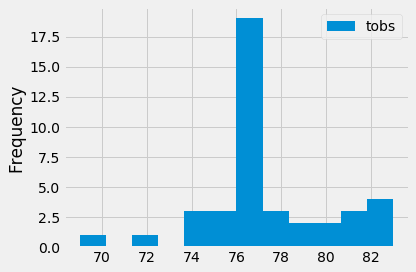

In [107]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

In [145]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start=None, end=None):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs),func.max(Measurement.tobs)]
    
    if not end:
        results = session.query(*sel).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
        
    results = session.query(*sel).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    temps = list(np.ravel(results))
    #print jsonify(temps)
    return(temps)
    

JulyTemp = calc_temps('2017-06-01', '2017-06-30')
JulyDF   = pd.DataFrame(JulyTemp, columns=['tobs'])

JulyDF

,tobs
0,71.000000
1,77.219895
2,83.000000


# Challenge

In [203]:
def WeatherData(start=None, end=None):
    # Perform a query to retrieve the data and precipitation scores
    results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    # Save the query results as a Pandas DataFrame and set the index to the date column
    df = pd.DataFrame(results, columns=['date','precipitation', 'temperature'])
    df.set_index(df['date'], inplace=True)

    # Sort the dataframe by date
    return(df)


In [206]:
JulyTemp = WeatherData('2016-07-01', '2016-07-30')

JulyTemp.describe()

# Use Pandas Plotting with Matplotlib to plot the data
#df.plot()

,precipitation,temperature
count,158.000000,182.000000
mean,0.389557,77.489011
std,1.164884,2.567840
min,0.000000,71.000000
25%,0.000000,76.000000
50%,0.050000,78.000000
75%,0.230000,79.750000
max,9.640000,83.000000


In [207]:
DecTemp = WeatherData('2016-12-01', '2016-12-31')
DecTemp.describe()




,precipitation,temperature
count,178.000000,200.000000
mean,0.199494,71.130000
std,0.342967,3.419292
min,0.000000,60.000000
25%,0.020000,69.000000
50%,0.060000,71.000000
75%,0.247500,74.000000
max,2.370000,78.000000



Comparing July and December Temperature and Percipitation.

July seems to has favorable temperature with 83F Max and 71F Min, however, December has lower rainfall with lower temperature. 
For Ice-cream surf July seems to better month to have long hour of operation.
